In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm

import utils

In [20]:
train_data = np.loadtxt(open("data/train_data.csv", "rb"), delimiter=",")
train_labels = np.loadtxt(open("data/train_labels.csv", "rb"), delimiter=",")
test_data = np.loadtxt(open("data/test_data.csv", "rb"), delimiter=",")

In [21]:
scaler = StandardScaler()
train_data_stand = scaler.fit_transform(train_data)
test_data_stand = scaler.fit_transform(test_data)

In [74]:
acc_lin = []
acc_poly = []
acc_rbf = []
acc_sig = []

because we have unbalanced data (a lot of 1 labels) we choose the option class_weight='balanced' to balance our data.

In [89]:
SVM_lin = svm.SVC(cache_size=2000, class_weight='balanced', kernel='linear', gamma=2, C=0.8)
SVM_poly = svm.SVC(cache_size=2000, class_weight='balanced', kernel='poly', gamma=2, C=0.8)
SVM_rbf = svm.SVC(cache_size=2000, class_weight='balanced', kernel='rbf',gamma=2, C=0.8)
SVM_sig = svm.SVC(cache_size=2000, class_weight='balanced', kernel='sigmoid',gamma=2, C=0.8)

In [90]:
SVM_lin.fit(train_data_stand,train_labels)
SVM_poly.fit(train_data_stand,train_labels)
SVM_rbf.fit(train_data_stand,train_labels)
SVM_sig.fit(train_data_stand,train_labels)

SVC(C=0.8, cache_size=2000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
predic_lin = SVM_lin.predict(train_data_stand)
predic_poly = SVM_poly.predict(train_data_stand)
predic_rbf = SVM_rbf.predict(train_data_stand)
predic_sig = SVM_sig.predict(train_data_stand)

In [92]:
acc_lin.append(sum(predic_lin == train_labels) / len(train_labels))
acc_poly.append(sum(predic_poly == train_labels) / len(train_labels))
acc_rbf.append(sum(predic_rbf == train_labels) / len(train_labels))
acc_sig.append(sum(predic_sig == train_labels) / len(train_labels))

In [95]:
n = len(acc_lin)
print(f'LIN: \t current accuary: {acc_lin[n-1]} \t before was: {acc_lin[n-2]} \t difference: {acc_lin[n-1] - acc_lin[2-1] }')
print(f'Poly: \t current accuary: {acc_poly[n-1]} \t before was: {acc_poly[n-2]} \t difference: {acc_poly[n-1] - acc_poly[2-1]}')
print(f'RBF: \t current accuary: {acc_rbf[n-1]} \t before was: {acc_rbf[n-2]} \t difference: {acc_rbf[n-1] - acc_rbf[2-1]}')
print(f'SIG: \t current accuary: {acc_sig[n-1]} \t before was: {acc_sig[n-2]} \t difference: {acc_sig[n-1] - acc_sig[2-1]}')

LIN: 	 current accuary: 0.8517075406830162 	 before was: 0.8546871418748567 	 difference: -0.0029796011918404863
Poly: 	 current accuary: 1.0 	 before was: 1.0 	 difference: 0.0
RBF: 	 current accuary: 0.8583543433417373 	 before was: 0.8583543433417373 	 difference: 0.0
SIG: 	 current accuary: 0.22461608984643594 	 before was: 0.2200320880128352 	 difference: 0.004584001833600748


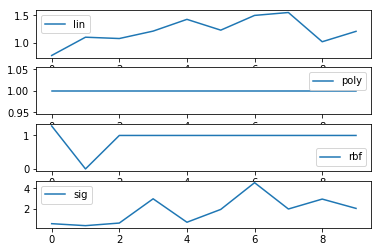

In [88]:
tmp_lin = []
tmp_poly = []
tmp_rbf = []
tmp_sig = []

for i in range(1,11):
    tmp_lin.append(sum(predic_lin == i)/sum(train_labels == i))
    tmp_poly.append(sum(predic_poly == i)/sum(train_labels == i))
    tmp_rbf.append(sum(predic_rbf == i)/sum(train_labels == i))
    tmp_sig.append(sum(predic_sig == i)/sum(train_labels == i))


f, axarr = plt.subplots(4)
axarr[0].plot(tmp_lin, label='lin')
axarr[0].legend()
axarr[1].plot(tmp_poly, label='poly')
axarr[1].legend()
axarr[2].plot(tmp_rbf, label='rbf')
axarr[2].legend()
axarr[3].plot(tmp_sig, label='sig')
axarr[3].legend()


#plt.axhline(1, color='r', label=r'$k = 0.7$')

1.3144157218221495

In [34]:
utils.make_submission(SVM_poly.predict(test_data_stand),'SVM-poly')

(6544,)

In [33]:
test_data.shape

(6544, 264)

In [64]:
sum(predic == 1) / sum(train_labels == 1)

0.67753789618741389

In [4]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000, verbose=True)

In [5]:
clf.fit(train_data, train_labels)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [6]:
sum(clf.predict(test_data) != 1)

0

In [7]:
clf = MLPRegressor(alpha=0.001, hidden_layer_sizes = (30,50,25), max_iter = 50000, activation = 'logistic', verbose = 'True')

In [8]:
a = clf.fit(train_data, train_labels)

Iteration 1, loss = 4.16765784
Iteration 2, loss = 3.29439058
Iteration 3, loss = 3.11175446
Iteration 4, loss = 3.08343846
Iteration 5, loss = 3.05828652
Iteration 6, loss = 3.01610639
Iteration 7, loss = 2.96466533
Iteration 8, loss = 2.90433172
Iteration 9, loss = 2.84219189
Iteration 10, loss = 2.77371261
Iteration 11, loss = 2.73374565
Iteration 12, loss = 2.67232675
Iteration 13, loss = 2.62071140
Iteration 14, loss = 2.57653556
Iteration 15, loss = 2.54894319
Iteration 16, loss = 2.53205420
Iteration 17, loss = 2.50569313
Iteration 18, loss = 2.53116452
Iteration 19, loss = 2.52490728
Iteration 20, loss = 2.52018005
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [9]:
y_pred = clf.predict(train_data)

In [10]:
sum(np.round(y_pred) == train_labels)

1074

In [11]:
LogReg = LogisticRegression(multi_class='ovr', penalty='l1',tol=0.1)

In [12]:
LogReg.fit(train_data_stand, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.1,
          verbose=0, warm_start=False)

In [13]:
LogReg.score(train_data_stand,train_labels)

0.74094452086198992

In [14]:
LogReg.predict(test_data_stand)

array([ 9.,  1.,  1., ...,  1.,  3.,  1.])

In [51]:
from sklearn.model_selection import train_test_split

In [68]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
...     train_data_stand, train_labels, test_size=0.33, random_state=42)

Ytrain = Ytrain.astype(int)
Ytest = Ytest.astype(int)